# Iris Flower Classification

In [24]:
#An iris dataset has 3 types of flowers i.e, setosa, virginica, versicolor 
#with four main characteristics sepal length, sepal width, petal length , petal width
#loading the data

import numpy as np
import matplotlib.pyplot as plt #used for data visualization
import seaborn as sns #data visualization
import pandas as pd #used for loading data from different sources
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [27]:
#cols = ['sepal_length','sepal_widht','petal_length','petal_width']
df = pd.read_csv("F:\data set\Iris.csv")
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


# # Analyze and visualize the dataset


In [28]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [29]:
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [31]:
df.shape

(150, 6)

In [32]:
if 'species' in df:
    unique_species = df.species.unique()
    print(unique_species)
else:
    print("")

In [20]:
df.columns

Index(['sepal_length', 'sepal_widht', 'petal_length', 'petal_width'], dtype='object')

In [21]:
df.corr()

""


In [34]:
df.groupby('Species').mean()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
Species,,,,,
Iris-setosa,25.5,5.006,3.418,1.464,0.244
Iris-versicolor,75.5,5.936,2.770,4.260,1.326
Iris-virginica,125.5,6.588,2.974,5.552,2.026


# # Data Visualization


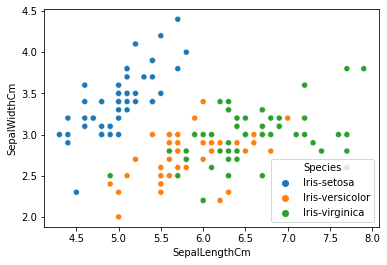

In [36]:
sns.scatterplot(x='SepalLengthCm', y='SepalWidthCm', hue='Species', data=df)
plt.show()


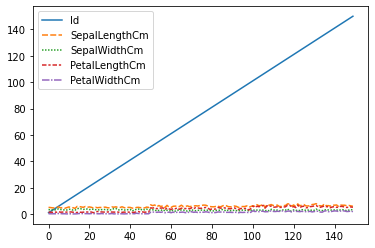

In [38]:
sns.lineplot(data=df.drop(['Species'], axis=1))
plt.show()

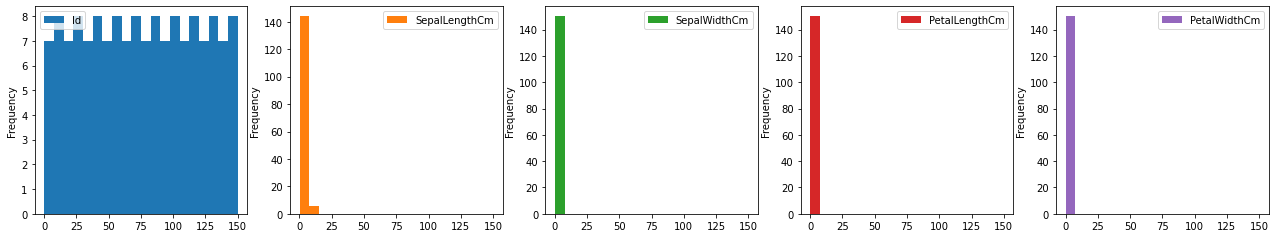

In [53]:
df.plot.hist(subplots=True, layout=(10,10), figsize=(45, 45), bins=20)
plt.show()

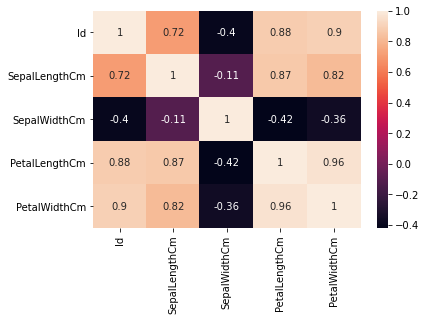

In [54]:
sns.heatmap(df.corr(), annot=True)
plt.show()

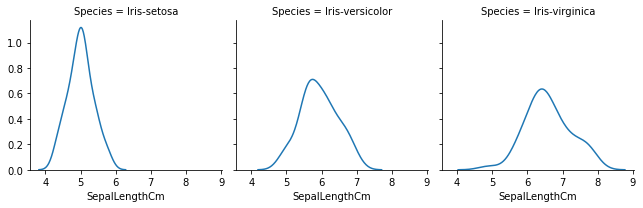

In [56]:
g = sns.FacetGrid(df, col='Species')
g = g.map(sns.kdeplot, 'SepalLengthCm')

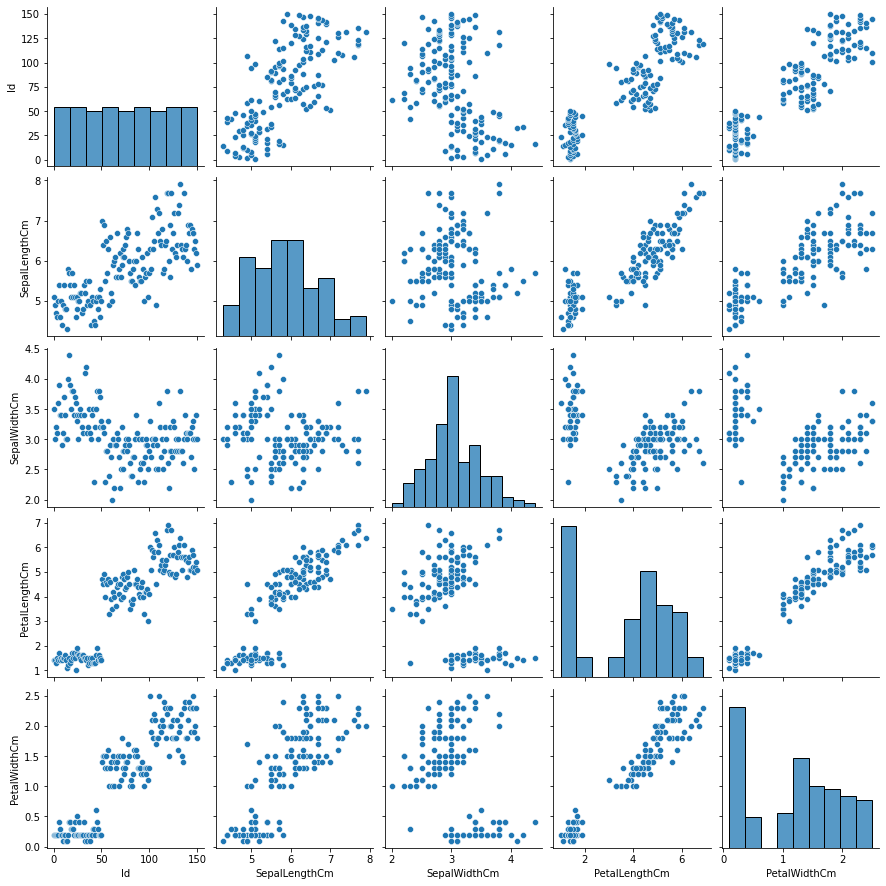

In [58]:
sns.pairplot(df)

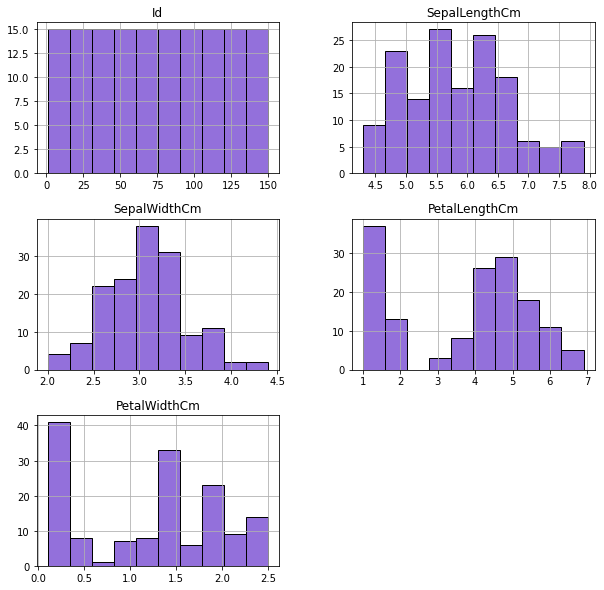

In [59]:
df.hist(color= 'mediumpurple' ,edgecolor='black',figsize=(10,10))
plt.show()

In [60]:
df.corr().style.background_gradient(cmap='coolwarm').set_precision(2)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
Id,1.00,0.72,-0.40,0.88,0.90
SepalLengthCm,0.72,1.00,-0.11,0.87,0.82
SepalWidthCm,-0.40,-0.11,1.00,-0.42,-0.36
PetalLengthCm,0.88,0.87,-0.42,1.00,0.96
PetalWidthCm,0.90,0.82,-0.36,0.96,1.00


# Machine Learning

In [61]:
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import accuracy_score

In [62]:
x = df.drop('Species', axis=1)
y= df.Species

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.4, random_state=5)

## K Neighbors Classifier

In [63]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5, p=2, metric='minkowski')
knn.fit(x_train, y_train)

knn.score(x_test, y_test)

1.0

## Logistic Regression

In [64]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(x, y)
y_pred = logreg.predict(x)
print(metrics.accuracy_score(y, y_pred))

1.0


## Support Vector Machine

In [65]:
from sklearn.svm import SVC
svm = SVC(kernel='rbf', random_state=0, gamma=.10, C=1.0)
svm.fit(x_train, y_train)

svm.score(x_test, y_test)

1.0

## Decision Tree Classifier

In [66]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier()
dtree.fit(x_train, y_train)

dtree.score(x_test, y_test)

1.0